In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.shape

(9240, 37)

##### Rows before removing highly null valued rows

In [7]:
rows_before = df.shape[0]
rows_before

9240

#### Percentage of missing values of all features

In [8]:
round((df.isnull().sum())/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping columns with high missing value percentage

In [9]:
# Replacing 'select' with NaNs
df = df.replace('Select',np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

Text(0.5, 1.0, 'Lead Quality')

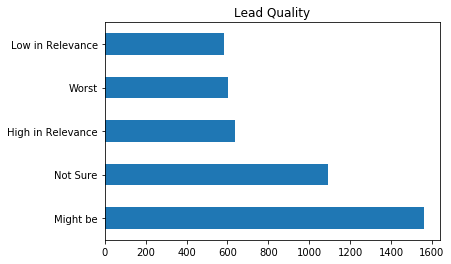

In [13]:
df['Lead Quality'].value_counts().plot.barh()
plt.title("Lead Quality")

In [14]:
#Since Lead quality is based on the expereice in company, so if left blank we can impute 'Neutral' in NaN safely.
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Neutral')

Text(0.5, 1.0, 'Lead Quality')

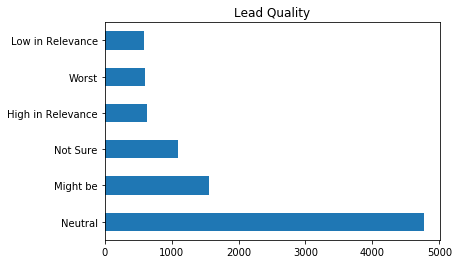

In [15]:
df['Lead Quality'].value_counts().plot.barh()
plt.title("Lead Quality")

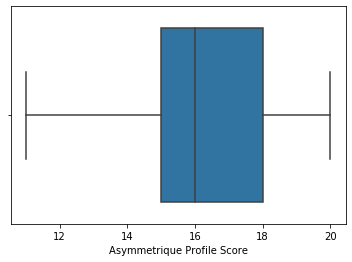

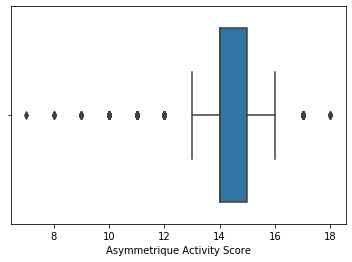

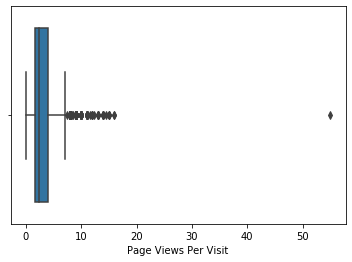

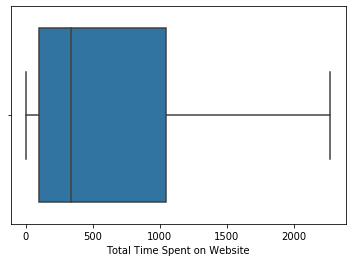

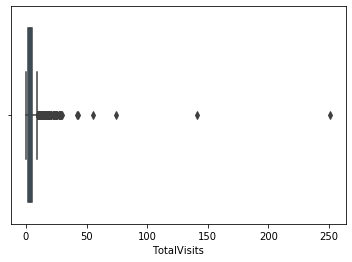

In [17]:
#### Removing the rows with more than 5 missing values

df = df[df.isnull().sum(axis=1) < 6]
df.shape

rows_after = df.shape[0]
rows_after

##### Percentage of rows retained after removing the rows with more than 5 missing attribures

print("Percentage of rows retained : ", end=" ")
(rows_after/rows_before)*100

for i in ['Asymmetrique Profile Score','Asymmetrique Activity Score','Page Views Per Visit','Total Time Spent on Website','TotalVisits']:
    sns.boxplot(df[i])
    plt.show()

### Replacing missing values of numerical features

#### Used MeanMedianImputer from sklearn feature_engine for imputation
 - MeanMedianImputer class provides an option of saving mean, median values for the future reference of analysis
 - It returns a dataframe in return, hence we need to concatinate it with the origial dataframe before proceeding

##### Replacing the missing values of features with outliers

In [82]:
df1 = df[['Asymmetrique Activity Score', 'Page Views Per Visit', 'TotalVisits']]

In [83]:
# Numerical features with outliers in them are [Asymmetric Activity Score, Page Views Per Visit, TotalVisits]
# and hence replacing the null values in these features with respective median values
from feature_engine.missing_data_imputers import MeanMedianImputer

median_imputer = MeanMedianImputer(imputation_method='median',variables=['Asymmetrique Activity Score', 'Page Views Per Visit', 'TotalVisits'])
median_imputer.fit(df1)
df1 = median_imputer.transform(df1)
round(df1.isnull().sum()/len(df1),2)

Asymmetrique Activity Score    0.0
Page Views Per Visit           0.0
TotalVisits                    0.0
dtype: float64

In [84]:
df1.head()

,Asymmetrique Activity Score,Page Views Per Visit,TotalVisits
0,15.0,0.0,0.0
1,15.0,2.5,5.0
2,14.0,2.0,2.0
3,13.0,1.0,1.0
4,15.0,1.0,2.0


In [85]:
df = df.drop(['Asymmetrique Activity Score', 'Page Views Per Visit', 'TotalVisits'], axis=1)
df.shape

(5027, 33)

In [86]:
# Concatinatin the df1 & df
df = pd.concat([df, df1], axis=1)
df.shape

(5027, 36)

In [87]:
df1 = df[['Asymmetrique Profile Score']]
df = df.drop('Asymmetrique Profile Score', axis=1)
df.shape

(5027, 35)

##### Repacing the missing values in the featues with no outliers in them

In [88]:
# Replacing the null values of the feature ['Asymmetrique Profile Score'] with MEAN since it doesn't contain any outliers
mean_imputer = MeanMedianImputer(imputation_method='mean', variables=['Asymmetrique Profile Score'])
mean_imputer.fit(df1)
df1 = mean_imputer.transform(df1)
round(df1.isnull().sum()/len(df1),2)

Asymmetrique Profile Score    0.0
dtype: float64

In [89]:
df = pd.concat([df, df1], axis=1)
df.shape

(5027, 36)

##### Replacing the missing values of the categorical (or) object features with the respective mode values

In [90]:
# Categorical features with missing values in them
cols = ['Lead Origin','Lead Source', 'Last Activity','Country','Specialization','How did you hear about X Education',
'What is your current occupation','What matters most to you in choosing a course',
'Tags','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index']

In [91]:
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace = True)

##### Re-checking the missing values in the dataframe & found no missing values presence

In [92]:
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
Total Time Spent on Website                      0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [93]:
for i in cols:
    print("Feature Name: ",i)
    print(df[i].value_counts()/len(df)*100)
    print("********************************")

Feature Name:  Lead Origin
Landing Page Submission    68.629401
API                        25.084543
Lead Add Form               5.709170
Lead Import                 0.576885
Name: Lead Origin, dtype: float64
********************************
Feature Name:  Lead Source
Google               39.367416
Direct Traffic       31.470062
Organic Search       13.268351
Olark Chat            7.897354
Reference             4.853790
Referral Sites        1.571514
Welingak Website      0.656455
Facebook              0.576885
google                0.079570
Press_Release         0.039785
Live Chat             0.039785
Click2call            0.039785
Social Media          0.039785
testone               0.019893
bing                  0.019893
NC_EDM                0.019893
WeLearn               0.019893
Pay per Click Ads     0.019893
Name: Lead Source, dtype: float64
********************************
Feature Name:  Last Activity
Email Opened                    41.734633
SMS Sent                        29.

##### Features such as Country, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Lead Profile, Asymmetrique Activity Index are highly skewed
- Hence dropping these is features is highly required

In [94]:
# Dropping the above mentioned features to remove the skewed data in DataFrame
df= df.drop(['Country', 'How did you hear about X Education','What is your current occupation',
             'What matters most to you in choosing a course','Lead Profile','Asymmetrique Activity Index'],
           axis = 1)
df.shape

(5027, 30)

#### Checking Cardinalities of the features

In [95]:
for i in df.columns:
    print("Feature Name: ",i)
    print(df[i].value_counts()/len(df)*100)
    print("********************************")

Feature Name:  Prospect ID
d450836a-cb34-48b7-bad7-9acb7da45843    0.019893
2f18dbbc-f863-43dc-a99e-ea1267e54fce    0.019893
8011d481-08bb-4f4f-a7dd-be98528caee2    0.019893
a303766c-f688-4908-bda8-5fc6d8a35bb8    0.019893
2a6f77a8-e6fc-417b-b388-7834a6303fac    0.019893
                                          ...   
88e5e9ea-c616-4229-ab42-537fe349f9cf    0.019893
cd6943e3-a99c-4fa4-96a6-95c054f569eb    0.019893
884b7c34-d951-497f-b9e6-de959d08d000    0.019893
ccf537d1-d20f-4499-bf23-9b6de4edcb89    0.019893
72027c75-b219-4df1-894a-777986040e47    0.019893
Name: Prospect ID, Length: 5027, dtype: float64
********************************
Feature Name:  Lead Number
651262    0.019893
647861    0.019893
581511    0.019893
643053    0.019893
653998    0.019893
            ...   
650591    0.019893
583730    0.019893
590119    0.019893
591202    0.019893
655360    0.019893
Name: Lead Number, Length: 5027, dtype: float64
********************************
Feature Name:  Lead Origin
Landing P

In [96]:
# Cells to create dummies
cols = ['Lead Origin','Lead Source','Last Activity','Specialization','Tags','City',
        'Asymmetrique Profile Index','Last Notable Activity',]

In [97]:
# Remove this line
['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview',
]

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [98]:
prospect_id = df['Prospect ID']
lead_number = df['Lead Number']

In [99]:
df = df.drop(['Prospect ID','Lead Number'], axis=1)
df.shape

(5027, 28)

Text(0.5, 1.0, 'Lead Source')

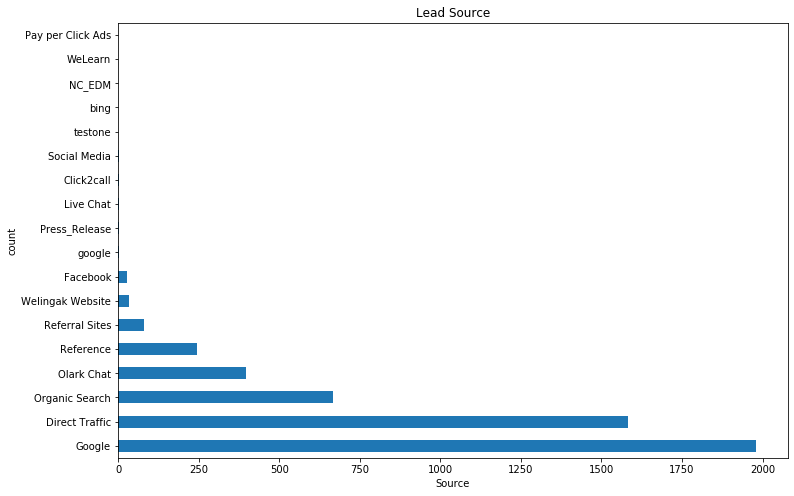

In [100]:
# Analysing the feature Lead Source
df['Lead Source'].value_counts().plot.barh(figsize=(12,8))
plt.ylabel("count")
plt.xlabel("Source")
plt.title("Lead Source")

##### Seems the feature Lead Source have the attribute Google & google repeated twice and we shall replace them with either "Google" or "google"

Text(0.5, 1.0, 'Lead Source')

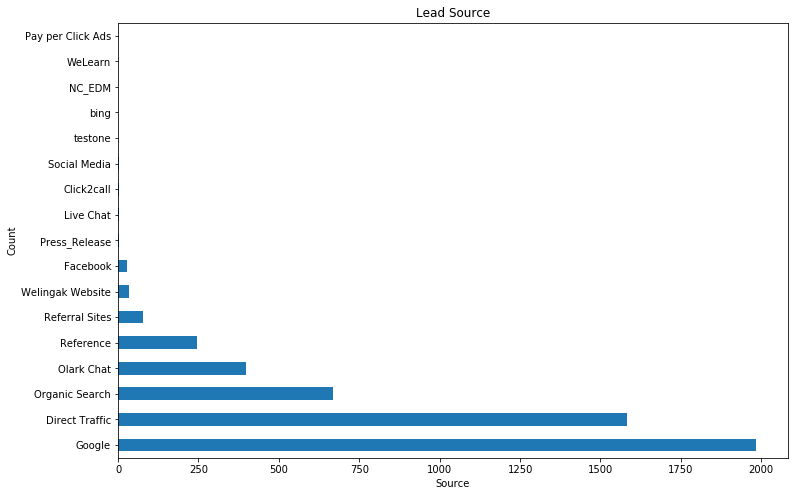

In [101]:
df['Lead Source'].replace("google","Google", inplace= True)
df['Lead Source'].value_counts().plot.barh(figsize=(12,8))
plt.xlabel("Source")
plt.ylabel("Count")
plt.title("Lead Source")

Text(0.5, 1.0, 'Lead Origin')

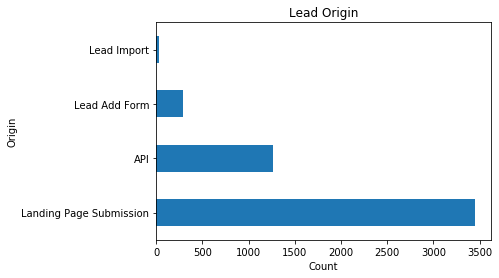

In [102]:
df['Lead Origin'].value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Origin")
plt.title("Lead Origin")

In [103]:
df['City'].value_counts()

Mumbai                         3377
Thane & Outskirts               568
Other Cities                    481
Other Cities of Maharashtra     311
Other Metro Cities              243
Tier II Cities                   47
Name: City, dtype: int64

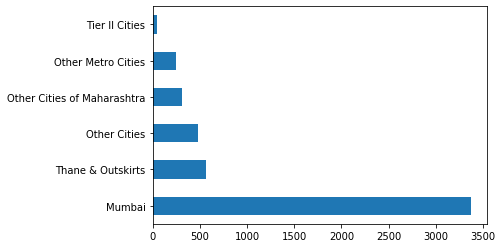

In [104]:
df['City'].value_counts().plot.barh()

#### Since the pairplot does not show any relations in data, we shall use the corelation matrix to check the corelation values

In [105]:
corelation_matrix = df.corr()
corelation_matrix

,Converted,Total Time Spent on Website,Asymmetrique Activity Score,Page Views Per Visit,TotalVisits,Asymmetrique Profile Score
Converted,1.000000,0.403943,0.270854,-0.027883,0.019124,0.156042
Total Time Spent on Website,0.403943,1.000000,0.058880,0.204434,0.172260,0.088140
Asymmetrique Activity Score,0.270854,0.058880,1.000000,-0.010949,0.070587,-0.029684
Page Views Per Visit,-0.027883,0.204434,-0.010949,1.000000,0.543353,0.058380
TotalVisits,0.019124,0.172260,0.070587,0.543353,1.000000,0.051141
Asymmetrique Profile Score,0.156042,0.088140,-0.029684,0.058380,0.051141,1.000000


In [106]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Specialization,Search,Magazine,...,Get updates on DM Content,City,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Asymmetrique Activity Score,Page Views Per Visit,TotalVisits,Asymmetrique Profile Score
0,API,Olark Chat,No,No,0,0,Page Visited on Website,Finance Management,No,No,...,No,Mumbai,02.Medium,No,No,Modified,15.0,0.0,0.0,15.0
1,API,Organic Search,No,No,0,674,Email Opened,Finance Management,No,No,...,No,Mumbai,02.Medium,No,No,Email Opened,15.0,2.5,5.0,15.0
2,Landing Page Submission,Direct Traffic,No,No,1,1532,Email Opened,Business Administration,No,No,...,No,Mumbai,01.High,No,Yes,Email Opened,14.0,2.0,2.0,20.0
3,Landing Page Submission,Direct Traffic,No,No,0,305,Unreachable,Media and Advertising,No,No,...,No,Mumbai,01.High,No,No,Modified,13.0,1.0,1.0,17.0
4,Landing Page Submission,Google,No,No,1,1428,Converted to Lead,Finance Management,No,No,...,No,Mumbai,01.High,No,No,Modified,15.0,1.0,2.0,18.0


In [107]:
df['Do Not Call'].value_counts()

No     5025
Yes       2
Name: Do Not Call, dtype: int64

##### Mapping columns with yes/no values to 1/0

In [108]:
varlist = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview',
]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [109]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Specialization,Search,Magazine,...,Get updates on DM Content,City,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Asymmetrique Activity Score,Page Views Per Visit,TotalVisits,Asymmetrique Profile Score
0,API,Olark Chat,0,0,0,0,Page Visited on Website,Finance Management,0,0,...,0,Mumbai,02.Medium,0,0,Modified,15.0,0.0,0.0,15.0
1,API,Organic Search,0,0,0,674,Email Opened,Finance Management,0,0,...,0,Mumbai,02.Medium,0,0,Email Opened,15.0,2.5,5.0,15.0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,Business Administration,0,0,...,0,Mumbai,01.High,0,1,Email Opened,14.0,2.0,2.0,20.0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Unreachable,Media and Advertising,0,0,...,0,Mumbai,01.High,0,0,Modified,13.0,1.0,1.0,17.0
4,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,Finance Management,0,0,...,0,Mumbai,01.High,0,0,Modified,15.0,1.0,2.0,18.0


In [110]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Time Spent on Website', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City', 'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Asymmetrique Activity Score', 'Page Views Per Visit', 'TotalVisits',
       'Asymmetrique Profile Score'],
      dtype='object')

In [111]:
df.shape

(5027, 28)

- drop Asymetric columns, Specialization, Tags

In [112]:
df = df.drop(['Tags','Specialization','Asymmetrique Activity Score','Asymmetrique Profile Index',
             'Asymmetrique Profile Score','X Education Forums',
             'Newspaper','Digital Advertisement','Through Recommendations',
             'Receive More Updates About Our Courses','Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [113]:
df.shape

(5027, 15)

In [114]:
# Removing Magazine, search, Newspaper Article, Do Not Call since these features are highly skewed
df = df.drop(['Magazine','Search','Newspaper Article','Do Not Call'], axis=1)
df.shape

(5027, 11)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5027 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             5027 non-null   object 
 1   Lead Source                             5027 non-null   object 
 2   Do Not Email                            5027 non-null   int64  
 3   Converted                               5027 non-null   int64  
 4   Total Time Spent on Website             5027 non-null   int64  
 5   Last Activity                           5027 non-null   object 
 6   City                                    5027 non-null   object 
 7   A free copy of Mastering The Interview  5027 non-null   int64  
 8   Last Notable Activity                   5027 non-null   object 
 9   Page Views Per Visit                    5027 non-null   float64
 10  TotalVisits                             5027 non-null   floa

#### Dummy Creation

In [116]:
object_cols = ['Lead Origin','Lead Source','Last Activity','City','Last Notable Activity']
for i in object_cols:
    dummy_df = pd.get_dummies(df[i], drop_first = True)
    df = pd.concat([df, dummy_df], axis = 1)
df.shape

(5027, 62)

#### Test Train Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = df.drop('Converted', axis = 1)
X.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,City,A free copy of Mastering The Interview,Last Notable Activity,Page Views Per Visit,TotalVisits,...,Email Marked Spam,Email Opened,Email Received,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
0,API,Olark Chat,0,0,Page Visited on Website,Mumbai,0,Modified,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,674,Email Opened,Mumbai,0,Email Opened,2.5,5.0,...,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1532,Email Opened,Mumbai,1,Email Opened,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,305,Unreachable,Mumbai,0,Modified,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1428,Converted to Lead,Mumbai,0,Modified,1.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

#### Feature scaling

In [121]:
from sklearn.preprocessing import StandardScaler

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5027 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             5027 non-null   object 
 1   Lead Source                             5027 non-null   object 
 2   Do Not Email                            5027 non-null   int64  
 3   Converted                               5027 non-null   int64  
 4   Total Time Spent on Website             5027 non-null   int64  
 5   Last Activity                           5027 non-null   object 
 6   City                                    5027 non-null   object 
 7   A free copy of Mastering The Interview  5027 non-null   int64  
 8   Last Notable Activity                   5027 non-null   object 
 9   Page Views Per Visit                    5027 non-null   float64
 10  TotalVisits                             5027 non-null   floa

In [129]:
# Scaling the numerical columns
# Before scaling numerical featues, convert the datatypes of columns Do Not Email, COnverted as obejct dtype
scaler = StandardScaler()

X_train[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']] = scaler.fit_transform(
    X_train[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']])
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,City,A free copy of Mastering The Interview,Last Notable Activity,Page Views Per Visit,TotalVisits,...,Email Marked Spam,Email Opened,Email Received,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
1737,API,Olark Chat,0,-0.767149,Email Opened,Mumbai,0,Email Opened,-0.618958,-0.271296,...,0,1,0,0,0,0,0,0,0,0
161,API,Olark Chat,0,2.146700,Had a Phone Conversation,Other Cities of Maharashtra,1,Had a Phone Conversation,0.225363,1.324722,...,0,0,0,1,0,0,0,0,0,0
394,Landing Page Submission,Google,0,-0.855501,Page Visited on Website,Other Cities of Maharashtra,0,Page Visited on Website,0.382231,1.552725,...,0,0,0,0,0,0,1,0,0,0
8399,API,Google,0,-1.035739,Email Opened,Mumbai,0,Email Opened,-0.849647,-0.271296,...,0,1,0,0,0,0,0,0,0,0
2343,Lead Add Form,Reference,0,-1.060478,Email Opened,Mumbai,0,Modified,-1.311024,-0.955303,...,0,0,0,0,1,0,0,0,0,0


In [130]:
X_train[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']].head()

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
1737,-0.767149,-0.618958,-0.271296
161,2.146700,0.225363,1.324722
394,-0.855501,0.382231,1.552725
8399,-1.035739,-0.849647,-0.271296
2343,-1.060478,-1.311024,-0.955303


In [133]:
df['Lead Score'].value_counts()/len(df)*100

KeyError: 'Lead Score'